## APPLIED STATISTICS

### Turma 9DTSR

### Trabalho prático usando Python
 
### Modelo de regressão linear simples



### Exemplo 
Faça a previsão das vendas (R$) mensal no período de 12 meses
da empresa XYZ a partir dos dados disponíveis de Vendas (R$) e Budget Advertising (R$) da empresa.

### Dicionário de variáveis
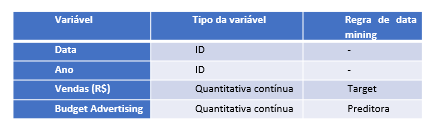


In [50]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
# Importar os dados

df = pd.read_csv('Vendas_2016a2018.csv', sep=";")

KeyboardInterrupt: 

In [ ]:
df.head()

,Data,ano,Vendas,Budget_Advertising
0,jan/16,2016,1160080.88,72800
1,fev/16,2016,1622539.52,123392
2,mar/16,2016,1597260.00,135761
3,abr/16,2016,1640674.56,148064
4,mai/16,2016,1511269.76,159746


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                36 non-null     object 
 1   ano                 36 non-null     int64  
 2   Vendas              36 non-null     float64
 3   Budget_Advertising  36 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [12]:
# Análise exploratória dos dados

df.describe().round(2)

,ano,Vendas,Budget_Advertising
count,36.00,36.00,36.00
mean,2017.00,2388185.93,267445.17
std,0.83,657317.41,112764.72
min,2016.00,1160080.88,72800.00
25%,2016.00,1827778.39,188879.75
50%,2017.00,2326152.00,259143.00
75%,2018.00,2902212.40,343735.75
max,2018.00,3708768.00,533582.00


Text(0.5, 1.0, 'Gráfico de dispersão entre Vendas e Budget')

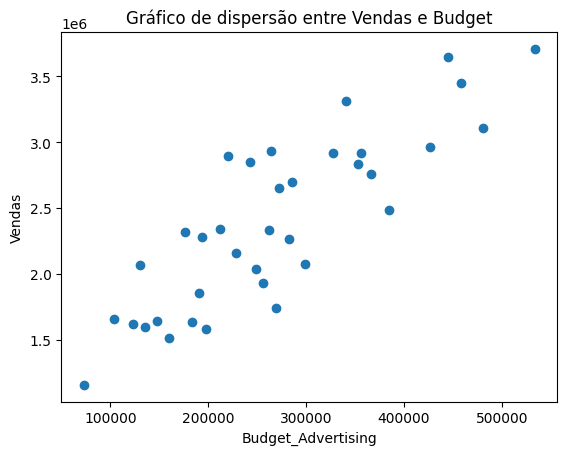

In [13]:
# Gráfico de dispersão ou scatterplot (Gráfico(X,Y))
plt.scatter('Budget_Advertising', 'Vendas', data=df)
plt.xlabel('Budget_Advertising')
plt.ylabel('Vendas')
plt.title('Gráfico de dispersão entre Vendas e Budget')

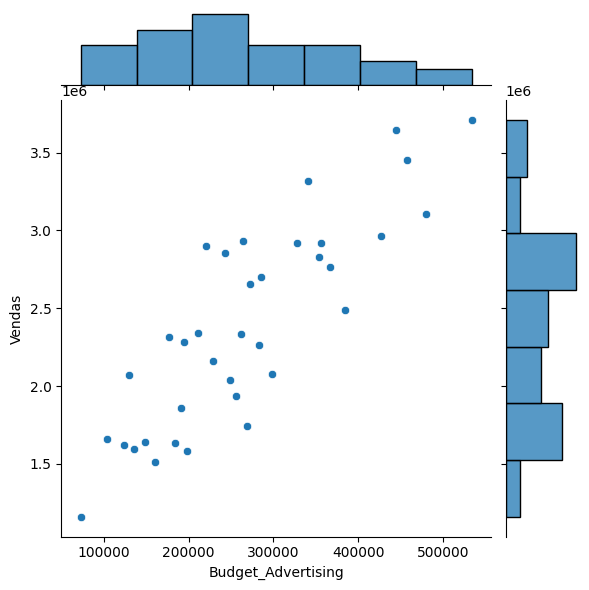

In [14]:
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='scatter')

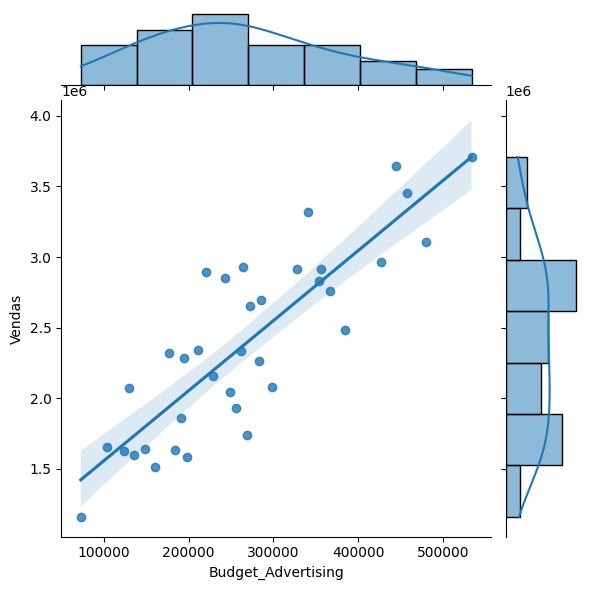

In [15]:
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='reg')

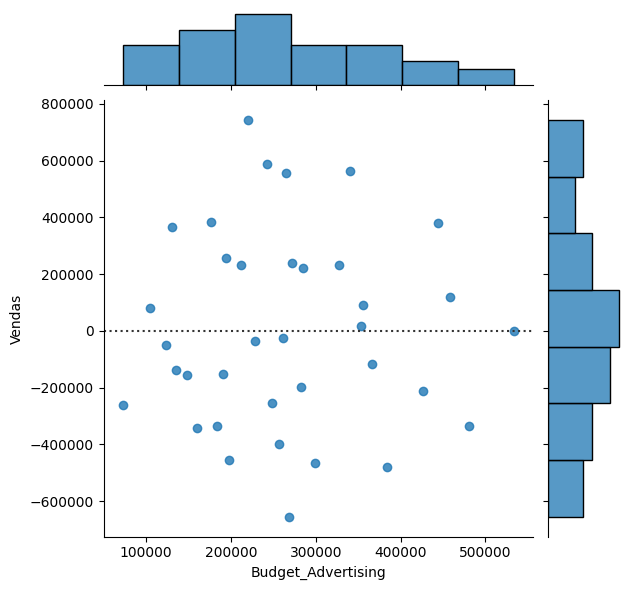

In [16]:
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='resid')

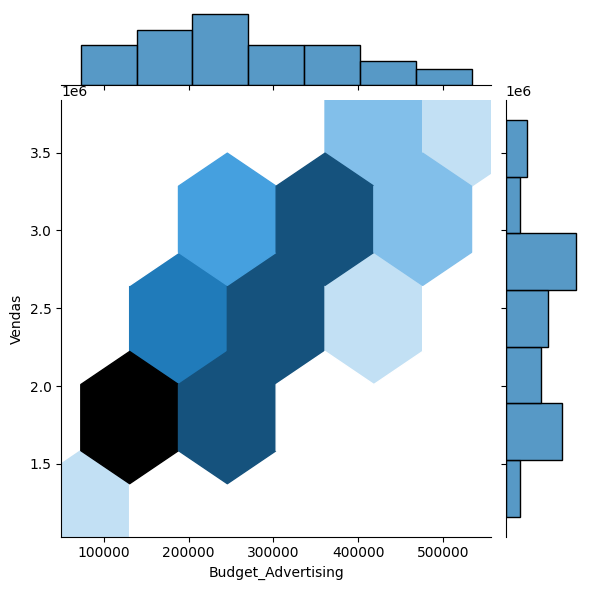

In [17]:
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='hex')

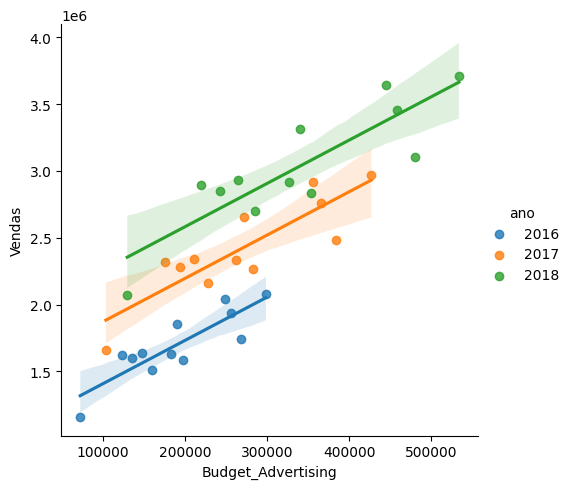

In [18]:
sns.lmplot(x='Budget_Advertising', y = 'Vendas', data=df, hue='ano')

In [19]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form dataset that will be internally
        reshaped.
    x, y : vectors or keys in ``data``
        Variables

### Análise de correlação de Pearson

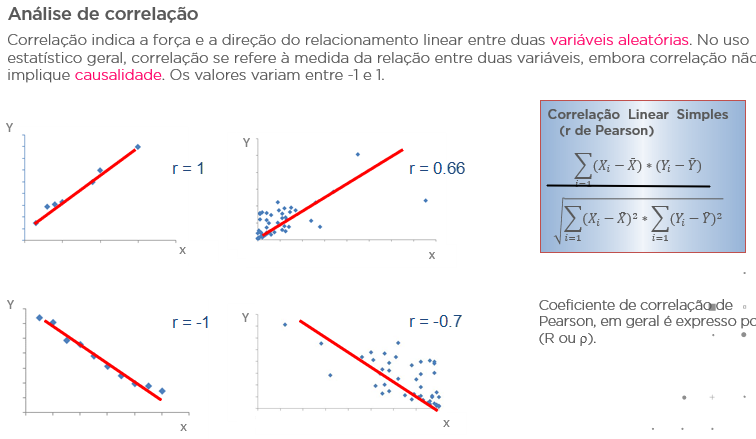

In [20]:

from scipy.stats.stats import pearsonr

from scipy.stats import pearsonr

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_8515/2119489052.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [21]:
#variaveis_quantitativas = df['Vendas', 'Budget_Advertising']

# Correlação de Pearson
pearsonr(df['Vendas'], df['Budget_Advertising'])

#(correlação de Pearson, p-value)

# Teste de hipótese
# H0: correlação = 0
# H1: correlação <> 0
# erro decisão: 0,05 ou 5%
# Critério de decisão:
# p-valor < erro decisão então rejeito H0
#p-valor >= erro decisão então não rejeito H0

# 4.5750154547011517e-11 --> aritmética -> 0,0000000000457

# conclusão: p-valor = 0,0000000000457 < 0,05, logo existe correlação positva entre Vendas e Budget
# 

# Correlação de Pearson
#corr = df[var_num].corr(method='pearson')
#corr

PearsonRResult(statistic=np.float64(0.8516128621823102), pvalue=np.float64(4.575015454701152e-11))

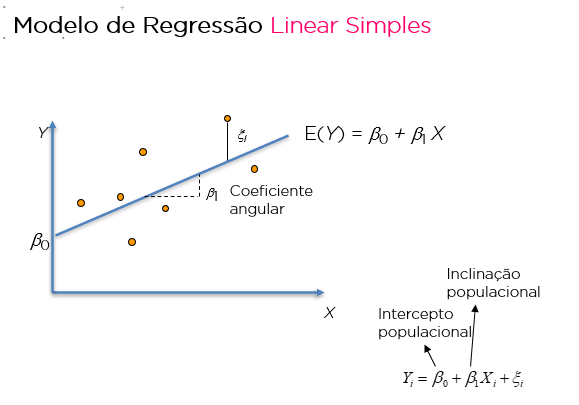

In [22]:
# Importar biblioteca
from sklearn.linear_model import LinearRegression
# linear Model
lm = LinearRegression()

In [23]:
# Definir a variável resposta (Y) e a preditora (X)
X = df[['Budget_Advertising']]

y = df[['Vendas']]

In [24]:
# Ajustar o modelo linear
lm.fit(X,y)

LinearRegression()

In [25]:
# Itercepto do modelo (b0)
print(lm.intercept_)

[1060550.39605172]


In [26]:
# Coeficiente angular (b1)
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficiente'])
coeff_df.round(4)

,Coefficiente
Budget_Advertising,4.9641


In [27]:
# modelo téorico
# y = b0 + b1*X

# modelo ajustado

# Vendas = 1060550.39605172 + 4.9641 * Budget_Advertising

# Vendas = 1060550.39605172 + 4.9641 *72800 = 1421939 

In [28]:
# Importar a biblioteca (Rn quadrado (R2) ou coeficiente de determinação do modelo)
# Medida de acurácia do modelo: R2 varia de 0 a 1, quanto mais próxima de 1 melhor o acerto

from sklearn.metrics import r2_score

In [29]:
predictions = lm.predict(X)

In [30]:
predictions

array([[1421939.86607256],
       [1673085.69117275],
       [1734487.15208879],
       [1795560.9796941 ],
       [1853552.07569387],
       [1970740.55397385],
       [2007321.30953131],
       [2042467.42831905],
       [2296080.43153189],
       [2333122.85220903],
       [2543860.56898546],
       [2395532.03376263],
       [1576821.06751006],
       [1935599.39932718],
       [2023315.77206438],
       [2110565.51554084],
       [2193412.06588669],
       [2360822.7593892 ],
       [2413080.27245114],
       [2463287.59525046],
       [2825595.43136957],
       [2878513.17519405],
       [3179568.47462926],
       [2967669.14884205],
       [1705888.73537465],
       [2154364.13221658],
       [2264012.08020861],
       [2373074.25955419],
       [2476631.20645123],
       [2685894.57332937],
       [2751212.74155099],
       [2813974.37712068],
       [3266857.9312343 ],
       [3333005.1110149 ],
       [3709326.71737945],
       [3444450.07807489]])

In [31]:
# R2 = 0.73 -> o Budget explica 73% da variação das Vendas e o erro de 27%
print(r2_score(y, predictions))

0.7252444670343463


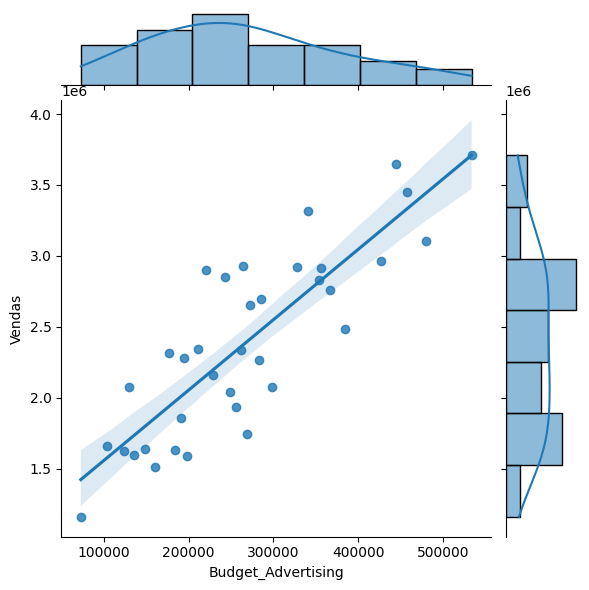

In [32]:
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='reg')

In [33]:
# Calcular a estimativa das Vendas pelo modelo

df["Vendas_estimadas"] = lm.predict(X).round(2)

In [34]:
df.head()

,Data,ano,Vendas,Budget_Advertising,Vendas_estimadas
0,jan/16,2016,1160080.88,72800,1421939.87
1,fev/16,2016,1622539.52,123392,1673085.69
2,mar/16,2016,1597260.00,135761,1734487.15
3,abr/16,2016,1640674.56,148064,1795560.98
4,mai/16,2016,1511269.76,159746,1853552.08


In [35]:
# Calcular o resíduo do modelo
df["Residuos"] = df['Vendas'] - df['Vendas_estimadas']

In [36]:
df.head()

,Data,ano,Vendas,Budget_Advertising,Vendas_estimadas,Residuos
0,jan/16,2016,1160080.88,72800,1421939.87,-261858.99
1,fev/16,2016,1622539.52,123392,1673085.69,-50546.17
2,mar/16,2016,1597260.00,135761,1734487.15,-137227.15
3,abr/16,2016,1640674.56,148064,1795560.98,-154886.42
4,mai/16,2016,1511269.76,159746,1853552.08,-342282.32


In [37]:
df.describe().round(2)

,ano,Vendas,Budget_Advertising,Vendas_estimadas,Residuos
count,36.00,36.00,36.00,36.00,36.00
mean,2017.00,2388185.93,267445.17,2388185.93,-0.00
std,0.83,657317.41,112764.72,559779.96,344546.91
min,2016.00,1160080.88,72800.00,1421939.87,-655330.41
25%,2016.00,1827778.39,188879.75,1998176.12,-256271.43
50%,2017.00,2326152.00,259143.00,2346972.80,-30443.81
75%,2018.00,2902212.40,343735.75,2766903.15,234875.19
max,2018.00,3708768.00,533582.00,3709326.72,743027.87


(array([1., 4., 5., 6., 5., 3., 5., 3., 3., 1.]),
 array([-655330.406 , -515494.5784, -375658.7508, -235822.9232,
         -95987.0956,   43848.732 ,  183684.5596,  323520.3872,
         463356.2148,  603192.0424,  743027.87  ]),
 <BarContainer object of 10 artists>)

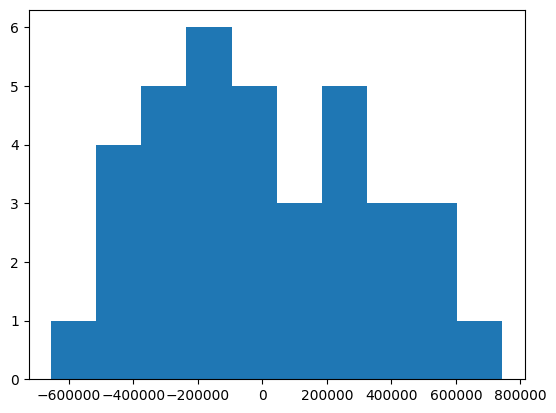

In [38]:
plt.hist(df['Residuos'])

In [39]:
# Calcular o resíduo padronizado (Normal(0,1))
# desvio padrão dos resíduos = 344546.91
media = df['Residuos'].mean()
dp = df['Residuos'].std()
df["residuo_padr"] = (df['Residuos']-media)/dp

In [40]:
df.head()

,Data,ano,Vendas,Budget_Advertising,Vendas_estimadas,Residuos,residuo_padr
0,jan/16,2016,1160080.88,72800,1421939.87,-261858.99,-0.760010
1,fev/16,2016,1622539.52,123392,1673085.69,-50546.17,-0.146703
2,mar/16,2016,1597260.00,135761,1734487.15,-137227.15,-0.398283
3,abr/16,2016,1640674.56,148064,1795560.98,-154886.42,-0.449537
4,mai/16,2016,1511269.76,159746,1853552.08,-342282.32,-0.993427


In [41]:
df.describe().round(2)

,ano,Vendas,Budget_Advertising,Vendas_estimadas,Residuos,residuo_padr
count,36.00,36.00,36.00,36.00,36.00,36.00
mean,2017.00,2388185.93,267445.17,2388185.93,-0.00,0.00
std,0.83,657317.41,112764.72,559779.96,344546.91,1.00
min,2016.00,1160080.88,72800.00,1421939.87,-655330.41,-1.90
25%,2016.00,1827778.39,188879.75,1998176.12,-256271.43,-0.74
50%,2017.00,2326152.00,259143.00,2346972.80,-30443.81,-0.09
75%,2018.00,2902212.40,343735.75,2766903.15,234875.19,0.68
max,2018.00,3708768.00,533582.00,3709326.72,743027.87,2.16


(array([1., 4., 5., 6., 5., 3., 5., 3., 3., 1.]),
 array([-1.90200632, -1.49615208, -1.09029783, -0.68444358, -0.27858934,
         0.12726491,  0.53311916,  0.93897341,  1.34482765,  1.7506819 ,
         2.15653615]),
 <BarContainer object of 10 artists>)

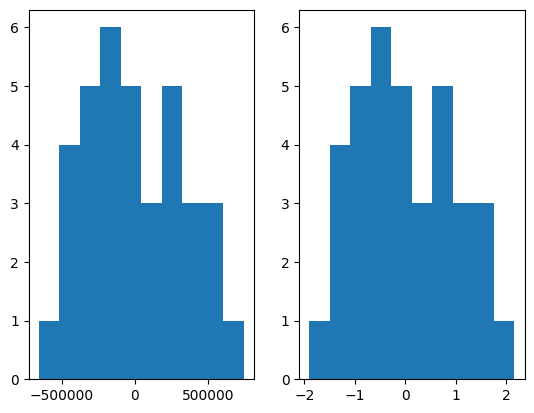

In [42]:
plt.subplot(1, 2, 1)
plt.hist(df['Residuos'])
plt.subplot(1, 2, 2)
plt.hist(df['residuo_padr'])


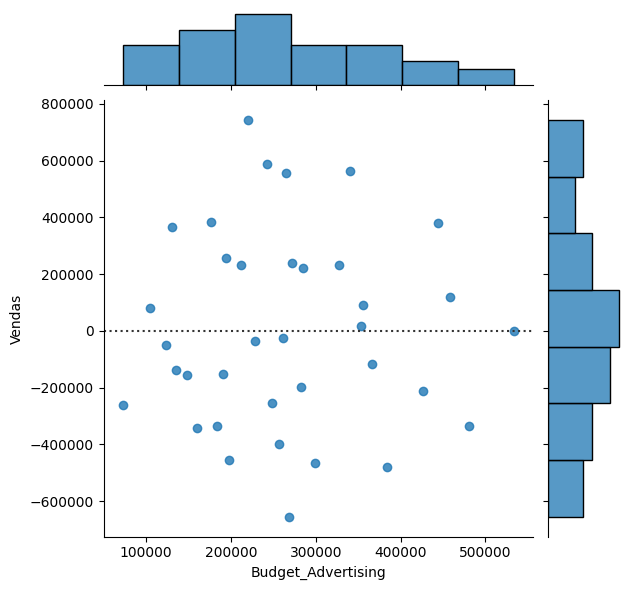

In [43]:
# Gráfico do resíduo
sns.jointplot(x='Budget_Advertising', y = 'Vendas', data=df, kind='resid')

### Previsão do modelo para  as Vendas em 2019 

In [44]:
# Importar a base de dados de 2019
Budget_2019 = pd.read_csv('Budget_2019.csv')

In [45]:
Budget_2019.head()

,Data,ano,Budget_Advertising
0,jan/19,2019,91000
1,fev/19,2019,154240
2,mar/19,2019,169702
3,abr/19,2019,185081
4,mai/19,2019,199683


In [ ]:
# Calcular as estimativas das Vendas para 2019

Budget_2019["Vendas_estimadas"] = (1060550.39605172 + 4.9641 * Budget_2019['Budget_Advertising']).round(2)

In [48]:
Budget_2019.head(12)

,Data,ano,Budget_Advertising,Vendas_estimadas
0,jan/19,2019,91000,1512283.50
1,fev/19,2019,154240,1826213.18
2,mar/19,2019,169702,1902968.09
3,abr/19,2019,185081,1979310.99
4,mai/19,2019,199683,2051796.78
5,jun/19,2019,229192,2198282.40
6,jul/19,2019,238403,2244006.73
7,ago/19,2019,247253,2287939.01
8,set/19,2019,311114,2604951.40
9,out/19,2019,320442,2651256.53


In [49]:
# Calcular a estimativa do total de Vendas para 2019 
total = Budget_2019['Vendas_estimadas'].sum()
print('Vendas estimadas para 2019: Budget_2019 R$', total)

Vendas estimadas para 2019: Budget_2019 R$ 26902952.46
